In [1]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# System module
import os

# Hypothesis testing libraries
from scipy import stats

# Scikit-learn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Helper Functions
import wrangle

# Set the plotting context parameters
sns.set_context('notebook')

# Warning
import warnings
warnings.filterwarnings('ignore')

### Acquire and Prepare the Data

In [4]:
# Use the helper function to acquire and prepare train dataset
train = wrangle.wrangle_train_data()

# Print the dimensionality
print(train.shape)

# Inspect the dataset
train.head()

(7111, 17)


,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,carbon_monoxide,benzene,nitrogen_oxides,date,time,day,month,year,weekday
datetime,,,,,,,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010-03-10,18:00:00,10,3,2010,2
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010-03-10,19:00:00,10,3,2010,2
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010-03-10,20:00:00,10,3,2010,2
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010-03-10,21:00:00,10,3,2010,2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010-03-10,22:00:00,10,3,2010,2


In [5]:
# Inspect the dtypes of the columns in train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7111 entries, 2010-03-10 18:00:00 to 2011-01-01 00:00:00
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               7111 non-null   float64
 1   relative_humidity  7111 non-null   float64
 2   absolute_humidity  7111 non-null   float64
 3   sensor_1           7111 non-null   float64
 4   sensor_2           7111 non-null   float64
 5   sensor_3           7111 non-null   float64
 6   sensor_4           7111 non-null   float64
 7   sensor_5           7111 non-null   float64
 8   carbon_monoxide    7111 non-null   float64
 9   benzene            7111 non-null   float64
 10  nitrogen_oxides    7111 non-null   float64
 11  date               7111 non-null   object 
 12  time               7111 non-null   object 
 13  day                7111 non-null   int64  
 14  month              7111 non-null   int64  
 15  year               7111 non-null   i

**Takeways**
- The index is DateTimeIndex and the train data is collected from 6 pm on 2010-3-10 to 12 am on 2011-01-01. 
- The data quality is very good and the dataset is ready for exploration.
- The target variables are three chemcial gases causing air pollution: carbon_monoxide, bezene, and nitrogen_oxides.

In [7]:
# Use helper function to acquire and prepare the test dataset
test = wrangle.wrangle_test_data()

# Print the dimensionality of the test dataset
print(test.shape)

# Inspect the test dataset
test.head()

(2247, 14)


,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,date,time,day,month,year,weekday
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,2011-01-01,00:00:00,1,1,2011,5
2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,2011-01-01,01:00:00,1,1,2011,5
2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,2011-01-01,02:00:00,1,1,2011,5
2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,2011-01-01,03:00:00,1,1,2011,5
2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,2011-01-01,04:00:00,1,1,2011,5


In [9]:
# Inspect dtypes of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2247 entries, 2011-01-01 00:00:00 to 2011-04-04 14:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               2247 non-null   float64
 1   relative_humidity  2247 non-null   float64
 2   absolute_humidity  2247 non-null   float64
 3   sensor_1           2247 non-null   float64
 4   sensor_2           2247 non-null   float64
 5   sensor_3           2247 non-null   float64
 6   sensor_4           2247 non-null   float64
 7   sensor_5           2247 non-null   float64
 8   date               2247 non-null   object 
 9   time               2247 non-null   object 
 10  day                2247 non-null   int64  
 11  month              2247 non-null   int64  
 12  year               2247 non-null   int64  
 13  weekday            2247 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 263.3+ KB


**Takeways**
- The index of the test dataset is DateTimeIndex and it is collected from 12 am on 2011-01-01 to 2 pm on 2011-04-04. 
- The target variables are missing because it is the test dataset and those values need to be predicted.

## Explore the Train Data

### Sensors
- Are the sensors multigas sensors?
- What are the relationships between the senesors and the target variables?
- How does the environemnt (temperature and humidity) affect the sensors?

In [12]:
# Create a dataframe with sensors and target variables

df_sensors = train[['sensor_1','sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
                    'carbon_monoxide','benzene', 'nitrogen_oxides']]

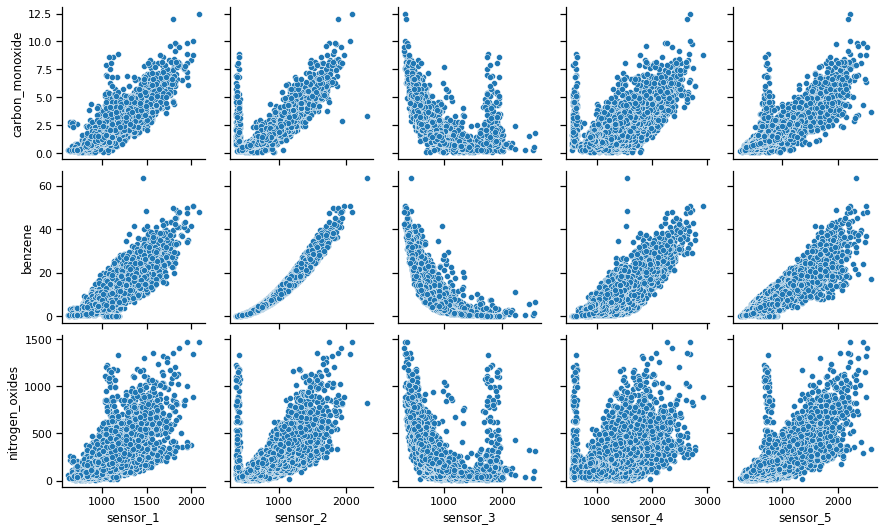

In [15]:
# Plot the relationships between sensors and target variables

sns.pairplot(
    df_sensors,
    x_vars = ['sensor_1','sensor_2', 'sensor_3', 'sensor_4', 'sensor_5'],
    y_vars = ['carbon_monoxide','benzene', 'nitrogen_oxides']
)
plt.show()

**Takeaways**
- The sensors are mulitgas sensors. Every sensor shows a correlation with each of the three chemicals. 